# Getting started

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

We start by importing the dataset, and having a look at the data.

In [3]:
# Load the character metadata using relative path

character_metadata = pd.read_csv("..\..\data\character.metadata.tsv", sep='\t')

column_names = ['Wikipedia_Movie_ID', 'Freebase_Movie_ID', 'Movie_Release_Date', 'Character_Name', 'Actor_DOB', 'Actor_Gender', 'Actor_Height', 'Actor_Ethnicity', 'Actor_Name', 'Actor_Age_At_Movie_Release', 'Freebase_Character_Actor_Map_ID', 'Freebase_character_ID', 'Freebase_Actor_ID']
character_metadata.columns = column_names

character_metadata.sample(5)

Wikipedia_Movie_ID Freebase_Movie_ID Movie_Release_Date  \
187497             5296875         /m/0dd58c               1977   
71004             13247285        /m/03b_56m               1967   
1839               3917900         /m/0b6qmv               2006   
318221            27981039        /m/0ch1sqt         1954-04-01   
438260             1409665         /m/04_73f         1999-08-13   

       Character_Name   Actor_DOB Actor_Gender  Actor_Height Actor_Ethnicity  \
187497            NaN  1925-09-16            M           NaN             NaN   
71004             NaN  1941-09-26            F          1.68             NaN   
1839              NaN  1947-05-16            M          1.83             NaN   
318221            NaN  1922-01-31            F          1.70             NaN   
438260          Daisy  1970-01-29            F          1.73       /m/07hwkr   

             Actor_Name  Actor_Age_At_Movie_Release  \
187497  Morgan Woodward                        51.0   
71004   Martine Beswick                        25.0   
1839    Bill Smitrovich                        58.0   
318221       Joanne Dru                        32.0   
438260   Heather Graham                        29.0   

       Freebase_Character_Actor_Map_ID Freebase_character_ID Freebase_Actor_ID  
187497                      /m/04hv7sl                   NaN         /m/0brgbp  
71004                       /m/04m85kc                   NaN         /m/083p1y  
1839                        /m/03lgvmm                   NaN         /m/08ztf1  
318221                      /m/0gw3q0r                   NaN         /m/04qc1y  
438260                      /m/03jrvsf            /m/0bc34f6         /m/016vg8

For conveniance, we will add a new line called Movie_Release_Year that contains the year of release instead of the precise date. This will allow us to plot the distribution of movie year of release more nicely. We add the attribute "format = 'mixed'" because the movie release date is presented in different formats depending on the movie. Avoiding this attribute would lead to a considerable amount of NaN values in the release year, even for movies that actually have a non NaN release date.  

In [4]:
character_metadata['Movie_Release_Date'] = pd.to_datetime(character_metadata['Movie_Release_Date'], format = 'mixed', errors='coerce')
character_metadata['Movie_Release_Year'] = character_metadata['Movie_Release_Date'].dt.year

character_metadata.sample(5)

Wikipedia_Movie_ID Freebase_Movie_ID Movie_Release_Date  \
444612            26344544        /m/0bbwns_         2002-11-11   
258857            11705958        /m/02rpld5         1949-01-01   
412924            25694530        /m/09v440j         2005-01-01   
242993            31156893        /m/027xy9h         2005-12-09   
292368             1022323        /m/01hz4ng         1958-07-02   

       Character_Name   Actor_DOB Actor_Gender  Actor_Height Actor_Ethnicity  \
444612            NaN        1956            M           NaN             NaN   
258857            NaN         NaN          NaN           NaN             NaN   
412924            NaN         NaN          NaN           NaN             NaN   
242993            NaN  1984-09-19            F          1.63       /m/071drf   
292368            NaN  1930-04-28            F          1.68             NaN   

             Actor_Name  Actor_Age_At_Movie_Release  \
444612    Kazuhiro Sano                        46.0   
258857    Peter Edwards                         NaN   
412924  Jefferson Moore                         NaN   
242993   Kavya Madhavan                        21.0   
292368    Carolyn Jones                        28.0   

       Freebase_Character_Actor_Map_ID Freebase_character_ID  \
444612                      /m/0bd2_z0                   NaN   
258857                      /m/0gw5vrc                   NaN   
412924                      /m/0gdmsws                   NaN   
242993                      /m/02vbcsf                   NaN   
292368                      /m/0b6sltx                   NaN   

       Freebase_Actor_ID  Movie_Release_Year  
444612        /m/03cb3jf              2002.0  
258857        /m/0glys5k              1949.0  
412924        /m/0gdkq4h              2005.0  
242993         /m/041x3p              2005.0  
292368         /m/02tgvh              1958.0

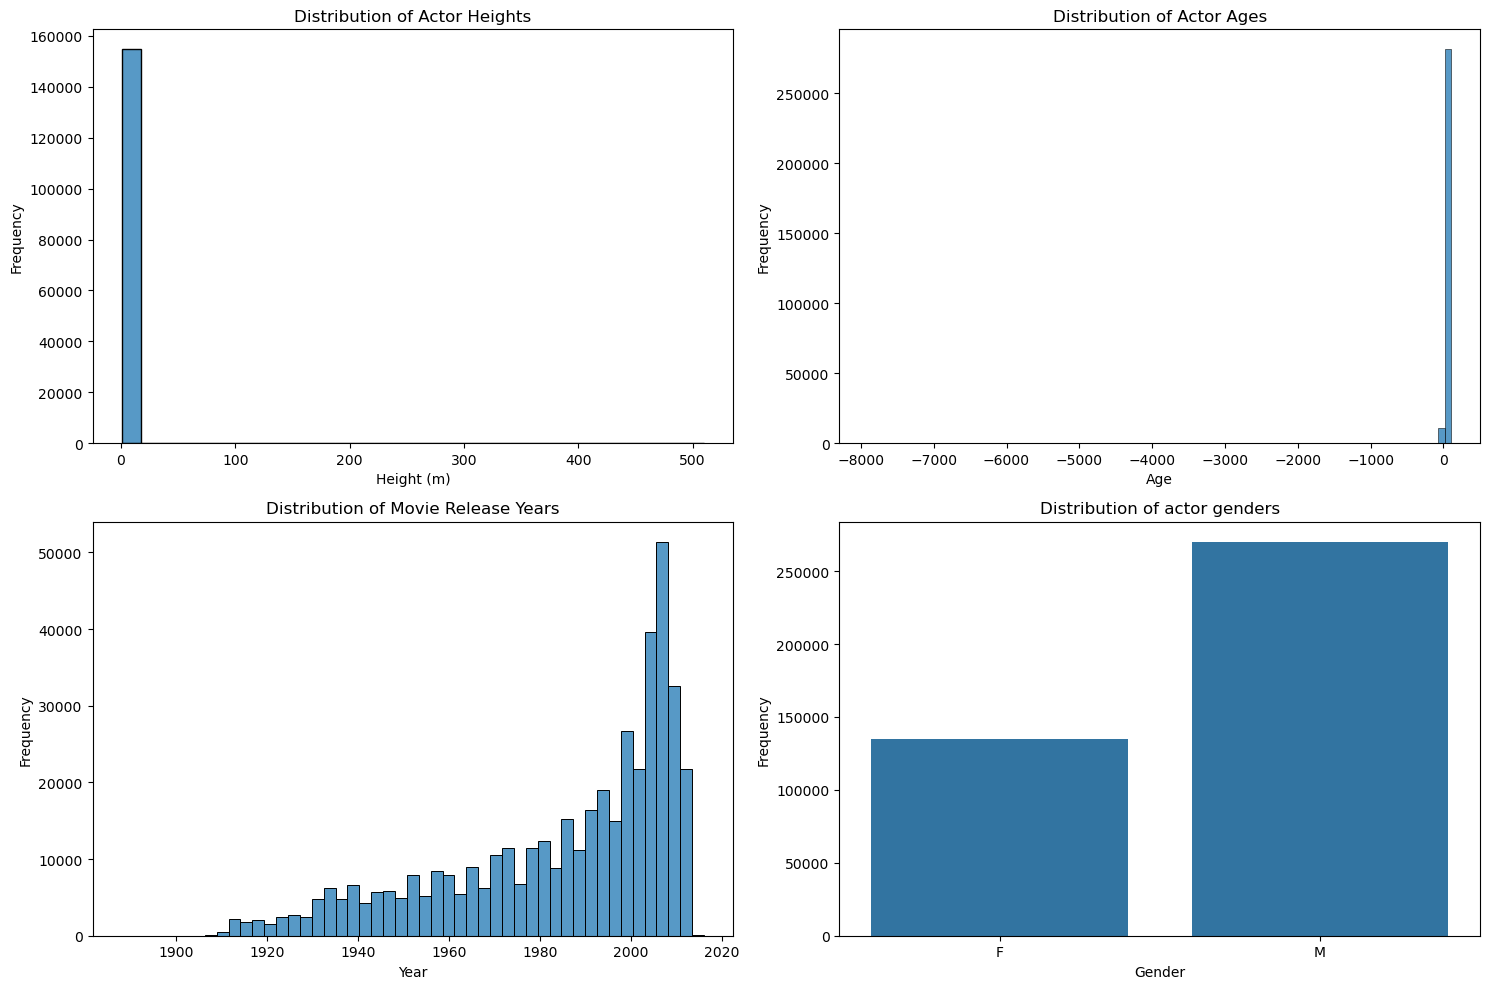

In [5]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
sns.histplot(character_metadata['Actor_Height'], bins=30, ax=axs[0, 0])
axs[0, 0].set_title('Distribution of Actor Heights')
axs[0, 0].set_xlabel('Height (m)')
axs[0, 0].set_ylabel('Frequency')

sns.histplot(character_metadata['Actor_Age_At_Movie_Release'], bins=92, ax=axs[0, 1])
axs[0, 1].set_title('Distribution of Actor Ages')
axs[0, 1].set_xlabel('Age')
axs[0, 1].set_ylabel('Frequency')

sns.histplot(character_metadata['Movie_Release_Year'], bins=49, ax=axs[1, 0])
axs[1, 0].set_title('Distribution of Movie Release Years')
axs[1, 0].set_xlabel('Year')
axs[1, 0].set_ylabel('Frequency')

sns.countplot(data=character_metadata, x='Actor_Gender', ax=axs[1, 1])
axs[1, 1].set_title('Distribution of actor genders')
axs[1, 1].set_xlabel('Gender')
axs[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

We can observe that some values seem aberrant. We will have to clean the dataset to make sure to have reasonnable data.

# General preprocessing

We will first do a general preprocessing, and then we will focus on cleaning our data according to our subject of study.

### Droping All NaNs and NaTs

Now we do not focus on any feature, and we decide to drop every single empty value.

In [6]:
copy1 = character_metadata.copy()
clean_data = copy1.dropna()

print("Length of original data: ", len(character_metadata), "Length of cleaned data: ", len(clean_data))

Length of original data:  450668 Length of cleaned data:  45264


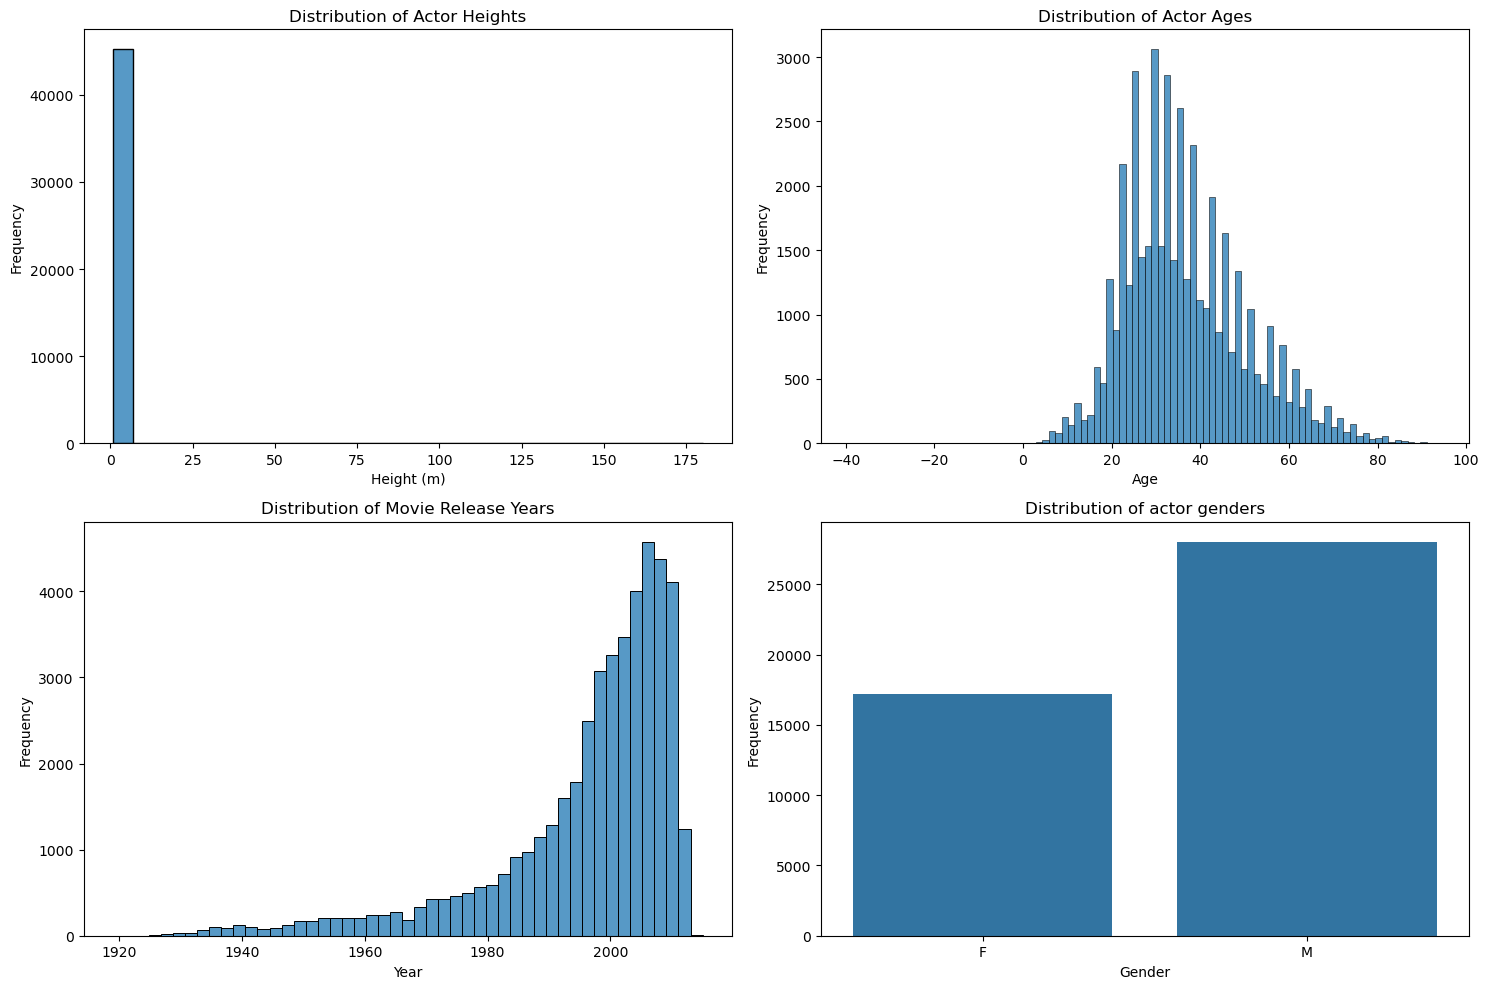

In [7]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
sns.histplot(clean_data['Actor_Height'], bins=30, ax=axs[0, 0])
axs[0, 0].set_title('Distribution of Actor Heights')
axs[0, 0].set_xlabel('Height (m)')
axs[0, 0].set_ylabel('Frequency')

sns.histplot(clean_data['Actor_Age_At_Movie_Release'], bins=92, ax=axs[0, 1])
axs[0, 1].set_title('Distribution of Actor Ages')
axs[0, 1].set_xlabel('Age')
axs[0, 1].set_ylabel('Frequency')

sns.histplot(clean_data['Movie_Release_Year'], bins=49, ax=axs[1, 0])
axs[1, 0].set_title('Distribution of Movie Release Years')
axs[1, 0].set_xlabel('Year')
axs[1, 0].set_ylabel('Frequency')

sns.countplot(data=clean_data, x='Actor_Gender', ax=axs[1, 1])
axs[1, 1].set_title('Distribution of actor genders')
axs[1, 1].set_xlabel('Gender')
axs[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Although we removed empty values, we can still clearly observe aberrant values.

### Dropping aberrant values

We can see that even if there are no empty value, some values seem aberrant. We will get rid of these aberrant values.

In [8]:
# remove rows with aberrant values

clean_data = clean_data[clean_data['Actor_Height'] > 0]
clean_data = clean_data[clean_data['Actor_Age_At_Movie_Release'] > 0]
clean_data = clean_data[clean_data['Actor_Age_At_Movie_Release'] < 110]
clean_data = clean_data[clean_data['Actor_Height'] < 3]
clean_data = clean_data[clean_data['Movie_Release_Year'] > 1850]
clean_data = clean_data[clean_data['Movie_Release_Year'] < 2020]

print("Length of cleaned data after removing aberrant values: ", len(clean_data))

Length of cleaned data after removing aberrant values:  45236


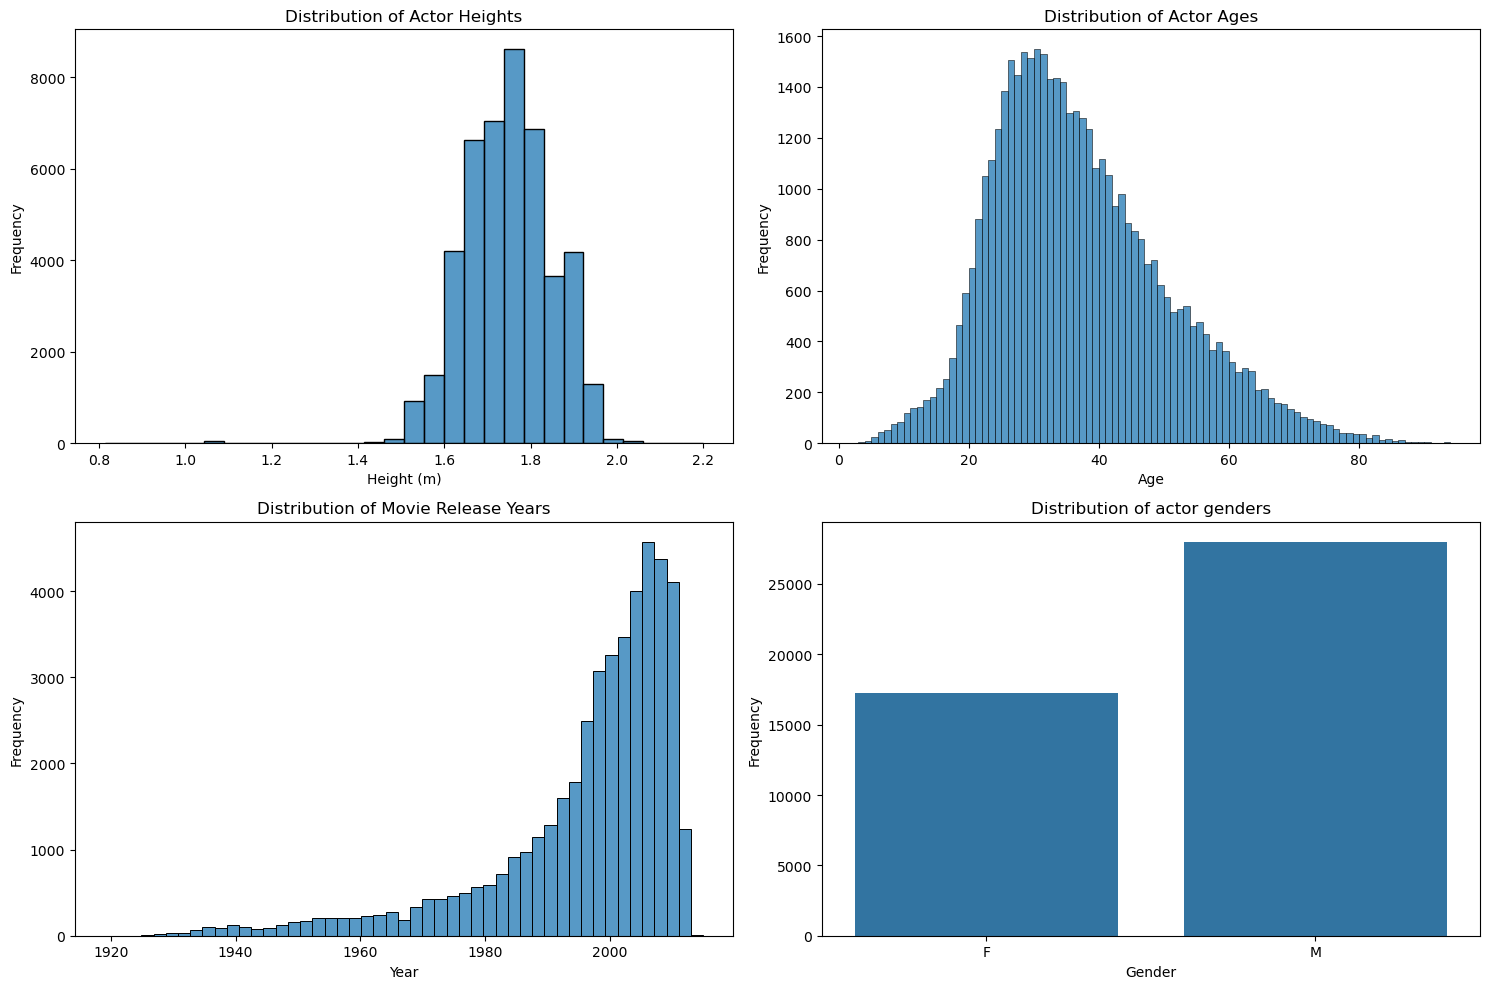

In [9]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
sns.histplot(clean_data['Actor_Height'], bins=30, ax=axs[0, 0])
axs[0, 0].set_title('Distribution of Actor Heights')
axs[0, 0].set_xlabel('Height (m)')
axs[0, 0].set_ylabel('Frequency')

sns.histplot(clean_data['Actor_Age_At_Movie_Release'], bins=92, ax=axs[0, 1])
axs[0, 1].set_title('Distribution of Actor Ages')
axs[0, 1].set_xlabel('Age')
axs[0, 1].set_ylabel('Frequency')

sns.histplot(clean_data['Movie_Release_Year'], bins=49, ax=axs[1, 0])
axs[1, 0].set_title('Distribution of Movie Release Years')
axs[1, 0].set_xlabel('Year')
axs[1, 0].set_ylabel('Frequency')

sns.countplot(data=clean_data, x='Actor_Gender', ax=axs[1, 1])
axs[1, 1].set_title('Distribution of actor genders')
axs[1, 1].set_xlabel('Gender')
axs[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Now the data seem reasonable !

# Taking into acount our subject

We are studying the impact of 9/11 on the movie industry. In this dataset, we are particularly interested in the release year and the actor ethnicity. We will get rid of all the useless columns.

First of all, we are interested in the column "ethnicity", so we need to create a function that maps from FreebaseID to the corresponding label. To do so, we use the freebase-wikidata-mapping dataset found here : https://www.kaggle.com/datasets/latebloomer/freebase-wikidata-mapping/data. 

In [10]:
def freebase2label(freebase_id, mapping_dataframe):
    label = mapping_dataframe[mapping_dataframe['freebase_id'] == freebase_id]['label']
    if len(label) > 0:
        return label.values[0]
    else:
        return None

In [11]:
file_path = r"..\..\data\freebase_mapping.tsv"
freebase_mapping_df = pd.read_csv(file_path, sep='\t')

In [13]:
copy2 = character_metadata.copy()

In [ ]:
# apply this function to the 'freebase_character_ID' column, for the non empty values

copy2['Ethnicity_Label'] = copy2['Actor_Ethnicity'].apply(lambda x: freebase2label(x, freebase_mapping_df) if pd.notnull(x) else None)

copy2.to_csv("..\..\data\Ethnicity_Labels.csv")